# Analyze the result of the model training

## Loading the data

In [1]:
import pickle
import numpy as np
import tensorflow as tf
import seaborn as sns
import time
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, confusion_matrix

2023-02-14 17:15:44.471275: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F AVX512_VNNI FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-02-14 17:15:44.562630: I tensorflow/core/util/port.cc:104] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2023-02-14 17:15:44.565255: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2023-02-14 17:15:44.565265: I tensorflow/compiler/xla/stream_executor/cuda/cudart_stub.cc:29] Ignore 

In [2]:
with open('../../data/pickle/train_x.pickle', "rb") as f:
    train_x = pickle.load(f)
train_x.shape

(15257, 150, 150, 3)

In [3]:
with open('../../data/pickle/train_y.pickle', "rb") as f:
    train_y = pickle.load(f)
train_y.shape

(15257, 8)

In [4]:
with open('../../data/pickle/val_x.pickle', "rb") as f:
    val_x = pickle.load(f)
val_x.shape

(4768, 150, 150, 3)

In [5]:
with open('../../data/pickle/val_y.pickle', "rb") as f:
    val_y = pickle.load(f)
val_y.shape

(4768, 8)

In [6]:
with open('../../data/pickle/test_x.pickle', "rb") as f:
    test_x = pickle.load(f)
test_x.shape

(3815, 150, 150, 3)

In [7]:
with open('../../data/pickle/test_y.pickle', "rb") as f:
    test_y = pickle.load(f)
test_y.shape

(3815, 8)

## Evaluate the model MobileNetV2

In [15]:
model = tf.keras.models.load_model('../../mobilenetv2.h')

In [16]:
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 150, 150, 3  0           []                               
                                )]                                                                
                                                                                                  
 Conv1 (Conv2D)                 (None, 75, 75, 32)   864         ['input_1[0][0]']                
                                                                                                  
 bn_Conv1 (BatchNormalization)  (None, 75, 75, 32)   128         ['Conv1[0][0]']                  
                                                                                                  
 Conv1_relu (ReLU)              (None, 75, 75, 32)   0           ['bn_Conv1[0][0]']           

In [12]:
def get_matrix(model_for_prediction, x, y):
    x_pred = []
    y_true = []
    start = time.time()

    for index, data in enumerate(x):
        pred = model_for_prediction.predict(data[np.newaxis, ...])
        x_pred.append(np.argmax(pred[0], axis=- 1))
        y_true.append(np.argmax(y[index], axis=- 1))

    end = time.time()
    average_inference = (end - start) / len(x)
    return x_pred, y_true, average_inference

In [12]:
y_train_pred, y_train_true, train_average_inference_mobile = get_matrix(model, train_x, train_y)
y_test_pred, y_test_true, test_average_inference_mobile = get_matrix(model, test_x, test_y)

1/1 [==============================] - 0s 52ms/step


### Train data results

In [1]:
sns.heatmap(confusion_matrix(y_train_true, y_train_pred),
            annot=True, cbar=False, fmt='d')
accuracy_train_mobile = accuracy_score(y_train_true, y_train_pred) * 100
plt.title(f'Accuracy: {accuracy_train_mobile:2.2f}')
plt.show()

NameError: name 'plt' is not defined

In [16]:
print(f"{train_average_inference_mobile * 1000:.2f} ms")

81.27 ms


### Test data results

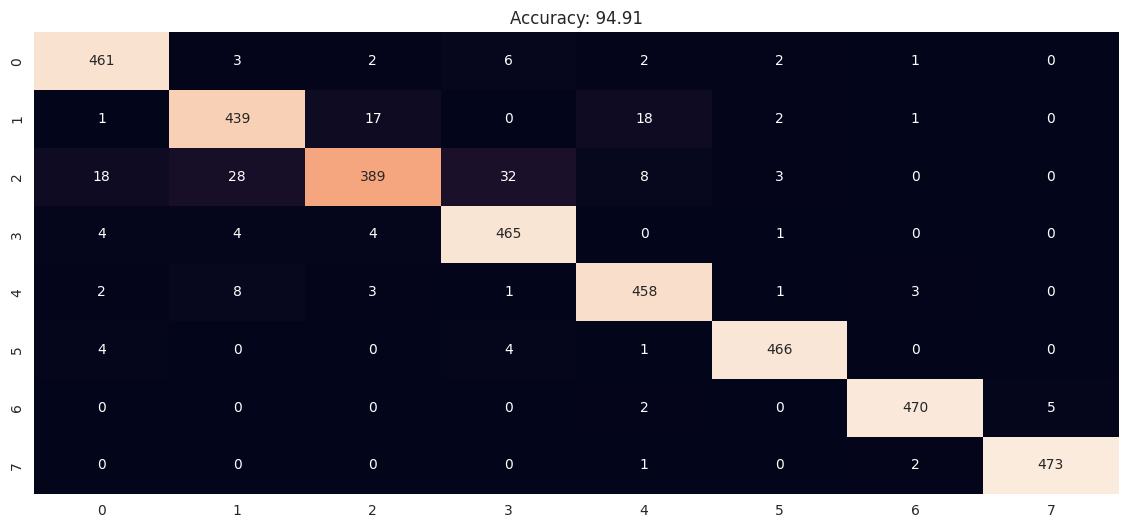

In [17]:
sns.heatmap(confusion_matrix(y_test_true, y_test_pred),
            annot=True, cbar=False, fmt='d')
accuracy_test_mobile = accuracy_score(y_test_true, y_test_pred) * 100
plt.title(f'Accuracy: {accuracy_test_mobile:2.2f}')
plt.show()

In [1]:
print(f"{test_average_inference_mobile * 1000:.2f} ms")

NameError: name 'test_average_inference_mobile' is not defined

## Evaluate the model ResNet50V2

In [8]:
model_resnet = tf.keras.models.load_model('../../resnet50v2.h')

2023-02-14 17:15:49.306292: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:981] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2023-02-14 17:15:49.306577: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2023-02-14 17:15:49.306625: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcublas.so.11'; dlerror: libcublas.so.11: cannot open shared object file: No such file or directory
2023-02-14 17:15:49.306662: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcublasLt.so.11'; dlerror: libcublasLt.so.11: cannot open shared object file: No such file or directory
2023-02-14 17:15:49.306700: W tensorflow/c

In [9]:
model_resnet.summary()

Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_2 (InputLayer)           [(None, 150, 150, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv1_pad (ZeroPadding2D)      (None, 156, 156, 3)  0           ['input_2[0][0]']                
                                                                                                  
 conv1_conv (Conv2D)            (None, 75, 75, 64)   9472        ['conv1_pad[0][0]']              
                                                                                                  
 pool1_pad (ZeroPadding2D)      (None, 77, 77, 64)   0           ['conv1_conv[0][0]']       

In [13]:
y_train_res_pred, y_train_res_true, train_average_inference_res = get_matrix(model_resnet, train_x, train_y)
y_test_res_pred, y_test_res_true, test_average_inference_res = get_matrix(model_resnet, test_x, test_y)

1/1 [==============================] - 0s 58ms/step



KeyboardInterrupt



### Train data results

In [2]:
sns.heatmap(confusion_matrix(y_train_res_true, y_train_res_pred),
            annot=True, cbar=False, fmt='d')
accuracy_train_res = accuracy_score(y_train_res_true, y_train_res_pred) * 100
plt.title(f'Accuracy: {accuracy_train_res:2.2f}')
plt.show()

NameError: name 'sns' is not defined

In [3]:
print(f"{train_average_inference_res * 1000:.2f} ms")

NameError: name 'train_average_inference_res' is not defined

### Test data results

In [4]:
sns.heatmap(confusion_matrix(y_test_res_true, y_test_res_pred),
            annot=True, cbar=False, fmt='d')
accuracy_test_res = accuracy_score(y_test_res_true, y_test_res_pred) * 100
plt.title(f'Accuracy: {accuracy_test_res:2.2f}')
plt.show()

NameError: name 'sns' is not defined

In [ ]:
print(f"{test_average_inference_res * 1000:.2f} ms")

## Evaluate the custom cnn model

In [5]:
model_custom = tf.keras.models.load_model('../../custom_model.h')

NameError: name 'tf' is not defined

In [6]:
model_custom.summary()

NameError: name 'model_custom' is not defined

In [7]:
y_train_custom_pred, y_train_custom_true, train_average_inference_custom = get_matrix(model_custom, train_x, train_y)
y_test_custom_pred, y_test_custom_true, test_average_inference_custom = get_matrix(model_custom, test_x, test_y)

NameError: name 'get_matrix' is not defined

### Train data results

In [ ]:
sns.heatmap(confusion_matrix(y_train_custom_true, y_train_custom_pred),
            annot=True, cbar=False, fmt='d')
accuracy_train_custom = accuracy_score(y_train_custom_true, y_train_custom_pred) * 100
plt.title(f'Accuracy: {accuracy_train_custom:2.2f}')
plt.show()

In [ ]:
print(f"{train_average_inference_custom * 1000:.2f} ms")

### Test data results

In [ ]:
sns.heatmap(confusion_matrix(y_test_custom_true, y_test_custom_pred),
            annot=True, cbar=False, fmt='d')
accuracy_test_custom = accuracy_score(y_test_custom_true, y_test_custom_pred) * 100
plt.title(f'Accuracy: {accuracy_test_custom:2.2f}')
plt.show()

In [8]:
print(f"{test_average_inference_custom * 1000:.2f} ms")

NameError: name 'test_average_inference_custom' is not defined

In [ ]:
%store train_average_inference_mobile
%store train_average_inference_res
%store train_average_inference_custom
%store test_average_inference_mobile
%store test_average_inference_res
%store test_average_inference_custom

%store accuracy_train_mobile
%store accuracy_train_res
%store accuracy_train_custom
%store accuracy_test_mobile
%store accuracy_test_res
%store accuracy_test_custom

In [ ]:
%store -r